In [2]:
import json
import altair as alt
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import express as px
from scipy import stats
from scipy.stats import pointbiserialr, mannwhitneyu, chi2_contingency, f_oneway
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, LabelEncoder
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

df=pd.read_csv('final_stats.csv')

In [4]:
alt.themes.enable('default')

with open('dark_theme.json', 'r') as file:
    dark_theme = json.load(file)

def my_theme():
    dark_theme_config = {
    "config": {
        "view": {"fill": "black"},
        "background": "black",
        "axis": {"labelColor": "white", "titleColor": "white"},
        "text": {"color": "white"}
    }
}
    return dark_theme_config

alt.themes.register('my_theme', my_theme)
alt.themes.enable('my_theme')

ThemeRegistry.enable('my_theme')

In [10]:
top_10_df = df.groupby(['Primary Attribute']).apply(lambda x: x.nlargest(10, 'pro_win_rate')).reset_index(drop=True)
top_10_df = top_10_df.sort_values(by=['Primary Attribute', 'pro_win_rate'], ascending=[True, False])

chart = alt.Chart(top_10_df).mark_bar().encode(

    alt.X('pro_win_rate:Q', title='Pro Win Rate'),
    alt.Y('Name:N', title='Hero', sort=alt.EncodingSortField(field='Primary Attribute')),
    
    color=alt.Color('Primary Attribute:N',
                    scale=alt.Scale(domain=['str', 'int', 'agi', 'all'], range=['red', 'blue', 'green', 'purple']),
                    legend=None),
)

line_chart = alt.Chart(top_10_df).mark_line(color='gray').encode(
    alt.X('pro_pick:Q', title='Pro Picks'),
    alt.Y('Name:N'),
)

combined_chart = (chart + line_chart).properties(
    width=600,
    height=400,
    title='Top 10 Heroes Win Rate in Each Primary Attribute (Grouped Bar Chart)'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_chart

alt.LayerChart(...)

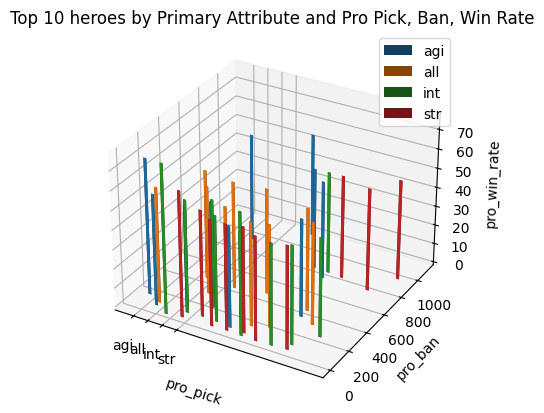

In [3]:
top_10_df = df.groupby(['Primary Attribute']).apply(lambda x: x.nlargest(10, 'pro_win_rate')).reset_index(drop=True)
top_10_df = top_10_df.sort_values(by=['Primary Attribute', 'pro_win_rate'], ascending=[True, False])

attributes = top_10_df['Primary Attribute'].unique()
x_pos = np.arange(len(attributes))
bar_width = 0.2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, attribute in enumerate(attributes):
    attribute_data = top_10_df[top_10_df['Primary Attribute'] == attribute]
    x_values = x_pos[i] + np.arange(len(attribute_data))
    baseline = np.zeros(len(attribute_data))  # Set baseline to zeros
    ax.bar3d(x_values,
             attribute_data['pro_ban'],
             baseline,
             bar_width,
             bar_width,
             attribute_data['pro_win_rate'],
             shade=True,
             label=attribute)

ax.set_xlabel('pro_pick')
ax.set_ylabel('pro_ban')
ax.set_zlabel('pro_win_rate')
ax.set_title('Top 10 heroes by Primary Attribute and Pro Pick, Ban, Win Rate')

ax.set_xticks(x_pos + (bar_width * len(attributes) / 2))
ax.set_xticklabels(attributes)
ax.legend()

plt.show()